In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
%matplotlib inline

from sklearn.cluster import DBSCAN

In [2]:
def getContours1(img):
    blur = cv2.GaussianBlur(img,(5,5),0)
    th = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,75,10)
    kernel = np.ones((3,3), np.uint8)
    img_dilation = cv2.dilate(th, kernel, iterations=1)
    img_bn = cv2.bitwise_not(img_dilation)
    con2, hier2 = cv2.findContours(img_bn, cv2.RETR_EXTERNAL, cv2.cv2.CHAIN_APPROX_SIMPLE)
    return img_bn,con2

In [3]:
def getContours2(img):
    blur = cv2.GaussianBlur(img,(5,5),0)
    ret3,th = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    kernel = np.ones((3,3), np.uint8)
    img_dilation = cv2.dilate(th, kernel, iterations=3)
    img_bn = cv2.bitwise_not(img_dilation)
    con2, hier2 = cv2.findContours(img_bn, cv2.RETR_EXTERNAL, cv2.cv2.CHAIN_APPROX_SIMPLE)
    return img_bn,con2

In [4]:
def getImageResized(image):
    img = cv2.imread(str(image),0)
    x,y = img.shape
    _,con = getContours1(img)
    area = 0
    for c in con:
        area += cv2.contourArea(c)
    change_factor = int(np.ceil(img.size/area)//10)
    print('resizing image by factor of {}'.format(change_factor))
    img_reshape = cv2.resize(img,(x*change_factor,y*change_factor))
    return(img_reshape)

In [5]:
def getBoundingBoxesCoordinates(contour_list):
    coord = []
    for i in contour_list:
        coord.append(cv2.boundingRect(i))
    x = [i[0] for i in coord]
    y = [i[1] for i in coord]
    w = [i[2] for i in coord]
    h = [i[3] for i in coord]
    return(x,y,w,h)

In [6]:
def getAreas(contour_list):
    areas_list = []
    for c in contour_list:
        areas_list.append(cv2.contourArea(c))
    return(np.asarray(areas_list).reshape(-1,1))

In [7]:
def getSortedCoordinates(contour_list):
    x,y,w,h = getBoundingBoxesCoordinates(contour_list)
    areas = getAreas(contour_list)
    x = np.asarray(x).reshape(-1,1)
    y = np.asarray(y).reshape(-1,1)
    w = np.asarray(w).reshape(-1,1)
    h = np.asarray(h).reshape(-1,1)
    mean_height = np.mean(h)
    db = DBSCAN(eps=mean_height/2,min_samples=1).fit(y)
    y_labels = db.labels_.reshape(-1,1)
    t1 = np.concatenate((x,y,w,h,areas,y_labels), axis=1)
    dtype = [('x_coord',int),('y_coord',int),('width',int),('height',int),('area',float),('label',int)]
    values = []
    for i in t1:
        values.append((i[0],i[1],i[2],i[3],i[4],i[5]))
    a = np.array(values, dtype=dtype)
    out = a[np.lexsort((a['x_coord'], -a['label']))]
    return(out)

In [8]:
img = getImageResized('x.jpg')

resizing image by factor of 15


In [9]:
o1,c1 = getContours2(img)

In [10]:
coord1 = getSortedCoordinates(c1)

1116 572 475 484


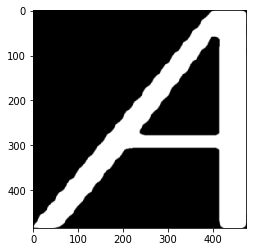

1936 575 543 483


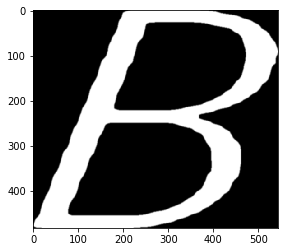

2524 693 446 374


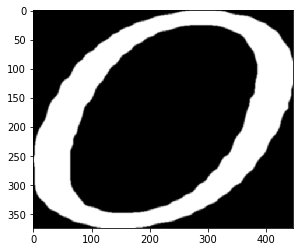

2997 692 461 362


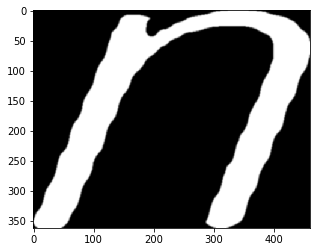

3546 693 484 372


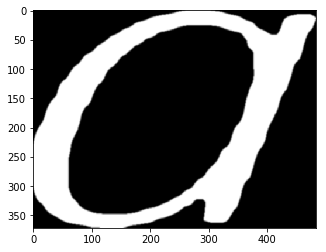

3990 695 551 522


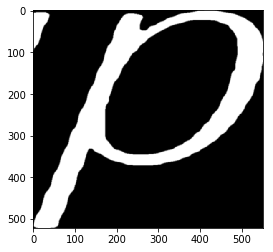

4628 693 484 372


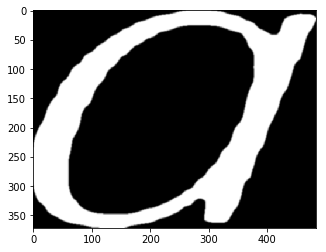

5147 692 375 362


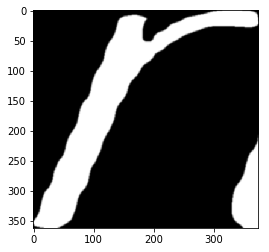

5477 617 278 450


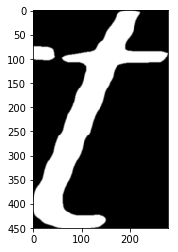

5774 693 401 374


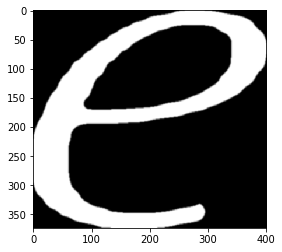

6347 702 104 67


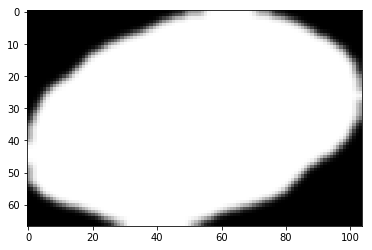

6729 543 551 522


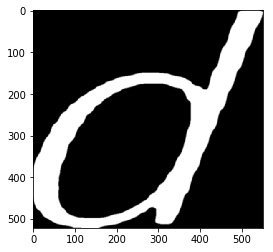

7281 693 401 374


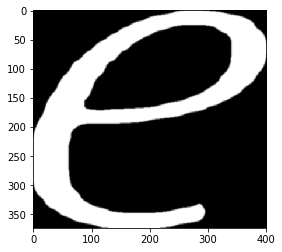

7748 543 551 522


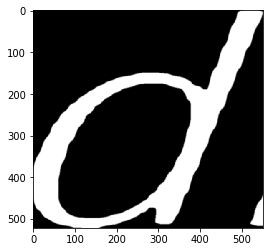

8268 706 201 354


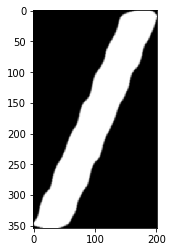

8448 575 83 59


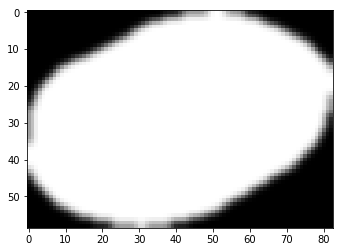

8533 693 382 374


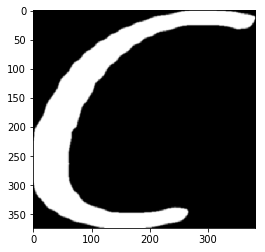

8915 693 484 372


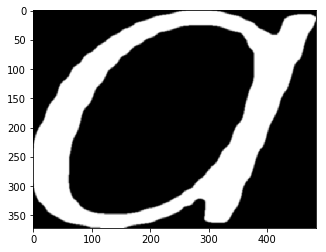

9679 543 551 522


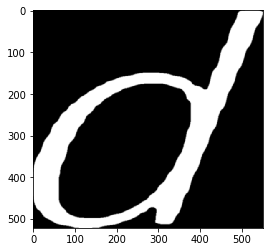

10231 693 401 374


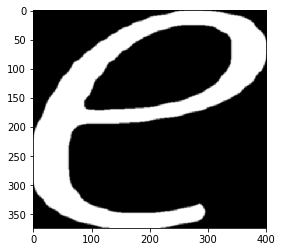

10685 547 270 511


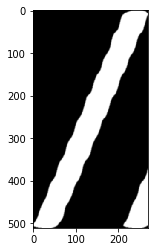

10897 547 271 511


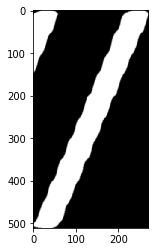

11227 576 119 173


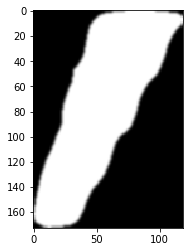

11396 693 446 374


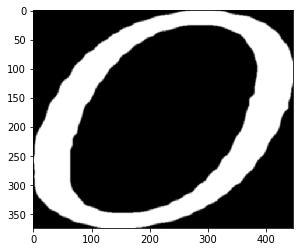

11929 543 551 522


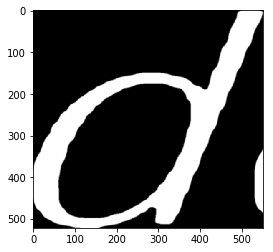

12460 693 484 372


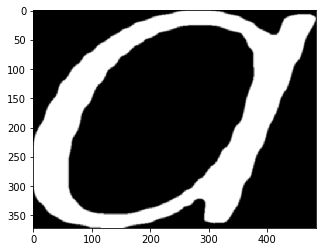

6220 999 103 67


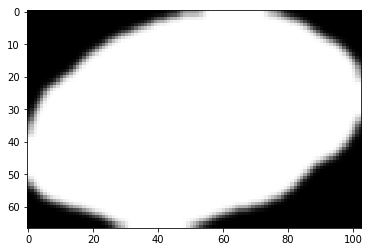

1253 1866 578 485


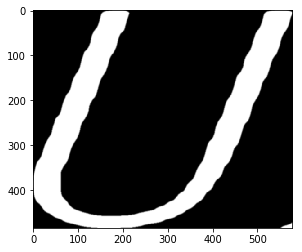

1742 1978 592 528


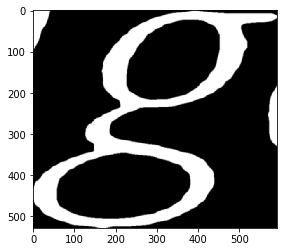

2312 1975 446 375


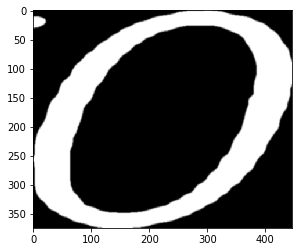

3020 1857 514 480


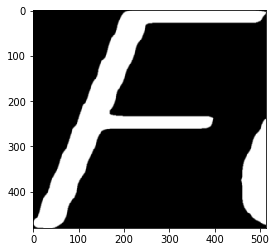

3479 1976 446 374


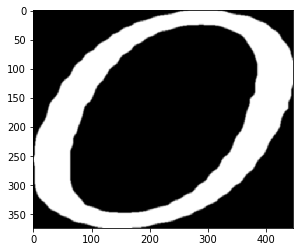

3935 1975 428 375


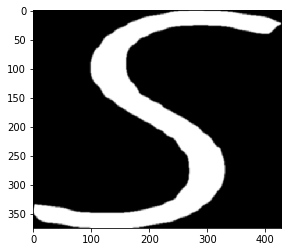

4394 1976 383 374


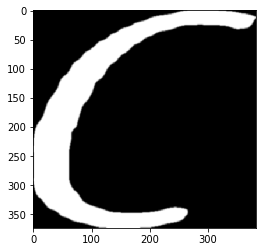

4795 1976 446 374


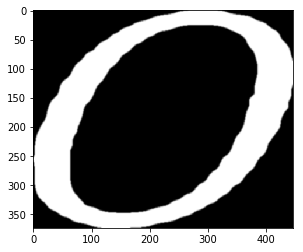

5272 1829 271 512


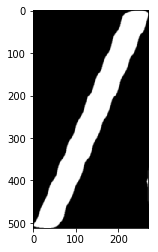

5538 1975 446 375


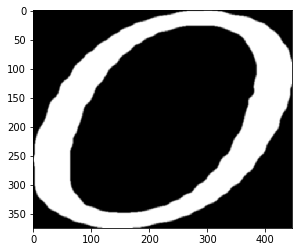

In [12]:
k = 1
for c in coord1:
    x1,y1,w1,h1,a1,l1 = c
    print(x1,y1,w1,h1)
    cropped = o1[y1:y1+h1, x1:x1+w1]
    
#     s = ("cropped_{}_.jpg".format(k))
#     cv2.imwrite(s , cropped)
    
    plt.imshow(cropped,cmap='gray')
    plt.show()